In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
UCI_df = pd.read_csv("/content/drive/MyDrive/Machine Learning Project/UCI Dataset.csv")

In [ ]:
print(UCI_df.head())

    UniqueID                  drugName                     condition  \
0     206461                 Valsartan  Left Ventricular Dysfunction   
1      95260                Guanfacine                          ADHD   
2      92703                    Lybrel                 Birth Control   
3     138000                Ortho Evra                 Birth Control   
4      35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37  


In [ ]:
print(UCI_df.columns)
UCI_df.shape

Index([' UniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


(161297, 7)

In [ ]:
UCI_df = UCI_df.drop([' UniqueID', 'date'], axis=1)
UCI_df = UCI_df.dropna()

In [ ]:
# Define a function to preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    # Stem the remaining words
    porter = PorterStemmer()
    stemmed_words = [porter.stem(word) for word in words]

    # Join the stemmed words back into a single string
    text = ' '.join(stemmed_words)

    return text

In [ ]:
# Apply the preprocessing function to the review column
UCI_df['review'] = UCI_df['review'].apply(preprocess_text)

In [ ]:
UCI_df.columns

Index(['drugName', 'condition', 'review', 'rating', 'usefulCount'], dtype='object')

In [ ]:
UCI_df = UCI_df.drop(['usefulCount'], axis=1)

In [ ]:
drug1_df = pd.read_csv("/content/drive/MyDrive/Machine Learning Project/drug1.csv")

In [ ]:
print(drug1_df.head())

          drug  dosage                condition  \
0  Mirtazapine   15.00               Depression   
1   Mesalamine  250.00      Lymphocytic Colitis   
2      Bactrim    0.24  Urinary Tract Infection   
3     Contrave    8.00              Weight Loss   
4       LEVORA    0.15            Birth Control   

                                              review  rating  usefulCount  \
0  "I&#039;ve tried a few antidepressants over th...      10           22   
1  "I am newly diagnosed with LC, I am 38 years o...       8           23   
2                      "Quick reduction of symptoms"       9            3   
3  "Contrave combines drugs that were used for al...       9           35   
4  "I was on this pill for almost two years. It d...       2            3   

         bp     sugar  temperature  age             Sideeffects  
0    normal    normal           97   30               dizziness  
1  abnormal  abnormal           97   22                headache  
2  abnormal  abnormal          1

In [ ]:
drug1_df = drug1_df.rename(columns={'drug' : 'drugName'})

In [ ]:
drug1_df

,drugName,dosage,condition,review,rating,usefulCount,bp,sugar,temperature,age,Sideeffects
0,Mirtazapine,15.00,Depression,"""I&#039;ve tried a few antidepressants over th...",10,22,normal,normal,97,30,dizziness
1,Mesalamine,250.00,Lymphocytic Colitis,"""I am newly diagnosed with LC, I am 38 years o...",8,23,abnormal,abnormal,97,22,headache
2,Bactrim,0.24,Urinary Tract Infection,"""Quick reduction of symptoms""",9,3,abnormal,abnormal,103,56,vomting
3,Contrave,8.00,Weight Loss,"""Contrave combines drugs that were used for al...",9,35,abnormal,abnormal,100,35,vomting and headache
4,LEVORA,0.15,Birth Control,"""I was on this pill for almost two years. It d...",2,3,abnormal,abnormal,97,30,headache and dizziness
...,...,...,...,...,...,...,...,...,...,...,...
394,Lo Loestrin Fe,1.00,Birth Control,"""Ive been on this pill for 9 months now and I ...",10,10,abnormal,abnormal,101,23,vomting
395,Ethinyl estradiol / norgestimate,0.25,Birth Control,"""I&#039;ve been on Sprintec for two months now...",5,2,abnormal,abnormal,102,18,vomting and headache
396,Guaifenesin / pseudoephedrine,60.00,Cough and Nasal Congestion,"""I have severe sinus problems all year long, b...",9,12,normal,normal,99,67,headache and dizziness
397,Glyburide,5.00,"Diabetes, Type 2","""I am taking 1/2 pill twice a day (5mg total) ...",9,11,normal,normal,97,72,weight gain


In [ ]:
drug1_df.columns

Index(['drugName', 'dosage', 'condition', 'review', 'rating', 'usefulCount',
       'bp', 'sugar', 'temperature', 'age', 'Sideeffects'],
      dtype='object')

In [ ]:
drug1_df = drug1_df.drop(['dosage', 'usefulCount', 'bp', 'sugar', 'temperature', 'age', 'Sideeffects'], axis = 1)

In [ ]:
# Apply the preprocessing function to the review column
drug1_df['review'] = drug1_df['review'].apply(preprocess_text)

In [ ]:
drug_df = pd.read_csv("/content/drive/MyDrive/Machine Learning Project/drug_review_test.csv")

In [ ]:
print(drug_df.head())

   Unnamed: 0  patient_id         drugName                     condition  \
0           0      163740      Mirtazapine                    depression   
1           1      206473       Mesalamine  crohn's disease, maintenance   
2           2       39293         Contrave                   weight loss   
3           3       97768  Cyclafem 1 / 35                 birth control   
4           4      208087          Zyclara                     keratosis   

                                              review  rating  \
0  "i've tried a few antidepressants over the yea...    10.0   
1  "my son has crohn's disease and has done very ...     8.0   
2  "contrave combines drugs that were used for al...     9.0   
3  "i have been on this birth control for one cyc...     9.0   
4  "4 days in on first 2 weeks.  using on arms an...     4.0   

                date  usefulCount  review_length  
0  February 28, 2012           22             68  
1       May 17, 2009           17             48  
2    

In [ ]:
drug_df.columns

Index(['Unnamed: 0', 'patient_id', 'drugName', 'condition', 'review', 'rating',
       'date', 'usefulCount', 'review_length'],
      dtype='object')

In [ ]:
drug_df = drug_df.drop(['Unnamed: 0', 'patient_id', 'date', 'usefulCount', 'review_length'], axis = 1)

In [ ]:
drug_df = drug_df.dropna()
drug1_df = drug1_df.dropna()

In [ ]:
# Apply the preprocessing function to the review column
drug_df['review'] = drug_df['review'].apply(preprocess_text)

In [ ]:
print(UCI_df.columns)
print(drug1_df.columns)
print(drug_df.columns)

Index(['drugName', 'condition', 'review', 'rating'], dtype='object')
Index(['drugName', 'condition', 'review', 'rating'], dtype='object')
Index(['drugName', 'condition', 'review', 'rating'], dtype='object')


Naive Bayes for UCI dataset

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(UCI_df["review"], UCI_df["rating"], test_size=0.3)

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict the ratings of the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy_1 = accuracy_score(y_test, y_pred)
precision_1 = precision_score(y_test, y_pred, average='weighted')
recall_1 = recall_score(y_test, y_pred, average='weighted')
f1_1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy:", accuracy_1)
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1-score:", f1_1)

Accuracy: 0.4228387364921031
Precision: 0.41321586812925803
Recall: 0.4228387364921031
F1-score: 0.35789056025190386


Naive Bayes for Drug1 dataset

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(drug1_df["review"], drug1_df["rating"], test_size=0.3)

# Vectorize the text data
vectorizer_1 = CountVectorizer(stop_words='english')
X_train_1 = vectorizer.fit_transform(X_train_1)
X_test_1 = vectorizer.transform(X_test_1)

# Train a Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train_1, y_train_1)

# Predict the ratings of the testing set
y_pred_1 = clf.predict(X_test_1)

# Calculate accuracy, precision, recall, and F1-score
accuracy_2 = accuracy_score(y_test_1, y_pred_1)
precision_2 = precision_score(y_test_1, y_pred_1, average='weighted')
recall_2 = recall_score(y_test_1, y_pred_1, average='weighted')
f1_2 = f1_score(y_test_1, y_pred_1, average='weighted')

# Print the results
print("Accuracy:", accuracy_2)
print("Precision:", precision_2)
print("Recall:", recall_2)
print("F1-score:", f1_2)

Accuracy: 0.9416666666666667
Precision: 0.95625
Recall: 0.9416666666666667
F1-score: 0.9301282051282052


Naive Bayes for Drug dataset

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(drug_df["review"], drug_df["rating"], test_size=0.2)

# Vectorize the text data
vectorizer_2 = CountVectorizer(stop_words='english')
X_train_2 = vectorizer.fit_transform(X_train_2)
X_test_2 = vectorizer.transform(X_test_2)

# Train a Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train_2, y_train_2)

# Predict the ratings of the testing set
y_pred_2 = clf.predict(X_test_2)

# Calculate accuracy, precision, recall, and F1-score
accuracy_3 = accuracy_score(y_test_2, y_pred_2)
precision_3 = precision_score(y_test_2, y_pred_2, average='weighted')
recall_3 = recall_score(y_test_2, y_pred_2, average='weighted')
f1_3 = f1_score(y_test_2, y_pred_2, average='weighted')

# Print the results
print("Accuracy:", accuracy_3)
print("Precision:", precision_3)
print("Recall:", recall_3)
print("F1-score:", f1_3)

Accuracy: 0.39947950553025374
Precision: 0.3949961391564589
Recall: 0.39947950553025374
F1-score: 0.3301837818092769


Graph comparing the Accuracy results of the three datasets based on the Naive Bayes Algorithm

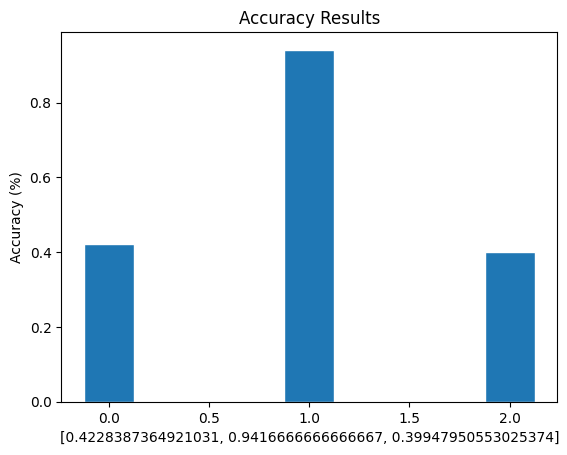

In [ ]:
import matplotlib.pyplot as plt

dataframes = [UCI_df, drug_df, drug1_df]
accuracies = [accuracy_1, accuracy_2, accuracy_3]
barWidth = 0.25
r = np.arange(len(dataframes))

plt.bar(r, accuracies, width=barWidth, edgecolor='white')
plt.title('Accuracy Results')
plt.ylabel('Accuracy (%)')
plt.xlabel(accuracies)
plt.show()



CNN: UCI dataset accuracy results

In [ ]:
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical


# Preprocess the dataset
X_1 = UCI_df['review'].values
y_1 = UCI_df['rating'].values

# Tokenize the input texts
tokenizer_1 = Tokenizer(num_words=20000)
tokenizer_1.fit_on_texts(X_1)
X_1 = tokenizer_1.texts_to_sequences(X_1)

# Pad the sequences
maxlen = 1000
X_1 = pad_sequences(X_1, padding='post', truncating='post', maxlen=maxlen)

# One-hot encode the target variable
y_1 = to_categorical(y_1-1)
num_classes = y_1.shape[1]

# Split the dataset into training and validation sets
X1_train, X1_val, y1_train, y1_val = train_test_split(X_1, y_1, test_size=0.3, random_state=42)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.callbacks import EarlyStopping

# Define the CNN model
model1 = Sequential()
model1.add(Embedding(input_dim=20000, output_dim=128, input_length=maxlen))
model1.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model1.add(MaxPooling1D(pool_size=5))
model1.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model1.add(MaxPooling1D(pool_size=5))
model1.add(Flatten())
model1.add(Dense(units=128, activation='relu'))
model1.add(Dropout(rate=0.5))
model1.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with early stopping
es1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history1 = model1.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=5, batch_size=64, callbacks=[es1])


Epoch 1/5
1755/1755 [==============================] - 1353s 770ms/step - loss: 1.7556 - accuracy: 0.3895 - val_loss: 1.6192 - val_accuracy: 0.4160
Epoch 2/5
1755/1755 [==============================] - 1371s 781ms/step - loss: 1.5186 - accuracy: 0.4447 - val_loss: 1.5485 - val_accuracy: 0.4385
Epoch 3/5
1755/1755 [==============================] - 1308s 746ms/step - loss: 1.3116 - accuracy: 0.5007 - val_loss: 1.5702 - val_accuracy: 0.4574
Epoch 4/5
1755/1755 [==============================] - 1339s 763ms/step - loss: 1.1172 - accuracy: 0.5702 - val_loss: 1.7027 - val_accuracy: 0.4476
Epoch 5/5
1755/1755 [==============================] - 1339s 763ms/step - loss: 0.9521 - accuracy: 0.6318 - val_loss: 1.7906 - val_accuracy: 0.4848
Epoch 5: early stopping


In [ ]:
# Evaluate the model on the test set
loss1, accuracy1 = model1.evaluate(X_1, y_1, verbose=0)
print('Test Loss:', loss1)
print('Test Accuracy:', accuracy1)

# Predict labels for test data
y1_pred = model1.predict(X_1)
y1_pred = np.argmax(y1_pred, axis=1)
y1_true = np.argmax(y_1, axis=1)

# Calculate precision, recall, and F1-score
precision1 = precision_score(y1_true, y1_pred, average='macro')
recall1 = recall_score(y1_true, y1_pred, average='macro')
f1score1 = f1_score(y1_true, y1_pred, average='macro')
print('Precision:', precision1)
print('Recall:', recall1)
print('F1-score:', f1score1)

Test Loss: 1.0724470615386963
Test Accuracy: 0.6473646759986877
5013/5013 [==============================] - 436s 87ms/step
Precision: 0.49610534510949095
Recall: 0.46137435069005034
F1-score: 0.44667699365672375


CNN: Drug1 dataset accuracy results

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical


# Preprocess the dataset
X_2 = drug1_df['review'].values
y_2 = drug1_df['rating'].values

# Tokenize the input texts
tokenizer_2 = Tokenizer(num_words=20000)
tokenizer_2.fit_on_texts(X_2)
X_2 = tokenizer_2.texts_to_sequences(X_2)

# Pad the sequences
maxlen = 1000
X_2 = pad_sequences(X_2, padding='post', truncating='post', maxlen=maxlen)

# One-hot encode the target variable
y_2 = to_categorical(y_2-1)
num_classes2 = y_2.shape[1]

# Split the dataset into training and validation sets
X2_train, X2_val, y2_train, y2_val = train_test_split(X_2, y_2, test_size=0.3, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.callbacks import EarlyStopping

# Define the CNN model
model2 = Sequential()
model2.add(Embedding(input_dim=20000, output_dim=128, input_length=maxlen))
model2.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model2.add(MaxPooling1D(pool_size=5))
model2.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model2.add(MaxPooling1D(pool_size=5))
model2.add(Flatten())
model2.add(Dense(units=128, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(units=num_classes2, activation='softmax'))

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with early stopping
es2 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history2 = model2.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=25, batch_size=64, callbacks=[es2])


Epoch 1/25
5/5 [==============================] - 5s 943ms/step - loss: 2.1839 - accuracy: 0.2043 - val_loss: 1.8125 - val_accuracy: 0.3500
Epoch 2/25
5/5 [==============================] - 4s 820ms/step - loss: 2.0428 - accuracy: 0.2437 - val_loss: 1.8859 - val_accuracy: 0.4333
Epoch 3/25
5/5 [==============================] - 3s 554ms/step - loss: 1.9951 - accuracy: 0.2724 - val_loss: 1.7486 - val_accuracy: 0.4917
Epoch 4/25
5/5 [==============================] - 3s 566ms/step - loss: 1.9475 - accuracy: 0.3441 - val_loss: 1.6877 - val_accuracy: 0.5333
Epoch 5/25
5/5 [==============================] - 3s 574ms/step - loss: 1.8365 - accuracy: 0.3477 - val_loss: 1.5334 - val_accuracy: 0.6333
Epoch 6/25
5/5 [==============================] - 5s 1s/step - loss: 1.6776 - accuracy: 0.4409 - val_loss: 1.3381 - val_accuracy: 0.6333
Epoch 7/25
5/5 [==============================] - 4s 680ms/step - loss: 1.5037 - accuracy: 0.4946 - val_loss: 1.1345 - val_accuracy: 0.6833
Epoch 8/25
5/5 [=======

In [ ]:
# Evaluate the model on the test set
loss2, accuracy2 = model2.evaluate(X_2, y_2, verbose=0)
print('Test Loss:', loss2)
print('Test Accuracy:', accuracy2)

# Predict labels for test data
y2_pred = model2.predict(X_2)
y2_pred = np.argmax(y2_pred, axis=1)
y2_true = np.argmax(y_2, axis=1)

# Calculate precision, recall, and F1-score
precision2 = precision_score(y2_true, y2_pred, average='macro')
recall2 = recall_score(y2_true, y2_pred, average='macro')
f1score2 = f1_score(y2_true, y2_pred, average='macro')
print('Precision:', precision2)
print('Recall:', recall2)
print('F1-score:', f1score2)

Test Loss: 0.014918740838766098
Test Accuracy: 1.0
13/13 [==============================] - 2s 111ms/step
Precision: 1.0
Recall: 1.0
F1-score: 1.0


CNN: DRUG dataset accuracy results

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical


# Preprocess the dataset
X_3 = drug_df['review'].values
y_3 = drug_df['rating'].values

# Tokenize the input texts
tokenizer_3 = Tokenizer(num_words=20000)
tokenizer_3.fit_on_texts(X_3)
X_3 = tokenizer_3.texts_to_sequences(X_3)

# Pad the sequences
maxlen = 1000
X_3 = pad_sequences(X_3, padding='post', truncating='post', maxlen=maxlen)

# One-hot encode the target variable
y_3 = to_categorical(y_3-1)
num_classes3 = y_3.shape[1]

# Split the dataset into training and validation sets
X3_train, X3_val, y3_train, y3_val = train_test_split(X_3, y_3, test_size=0.3, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.callbacks import EarlyStopping

# Define the CNN model
model3 = Sequential()
model3.add(Embedding(input_dim=20000, output_dim=128, input_length=maxlen))
model3.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model3.add(MaxPooling1D(pool_size=5))
model3.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model3.add(MaxPooling1D(pool_size=5))
model3.add(Flatten())
model3.add(Dense(units=128, activation='relu'))
model3.add(Dropout(rate=0.5))
model3.add(Dense(units=num_classes3, activation='softmax'))

# Compile the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with early stopping
es3 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history3 = model3.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=5, batch_size=64, callbacks=[es3])


Epoch 1/5
505/505 [==============================] - 399s 788ms/step - loss: 1.9005 - accuracy: 0.3469 - val_loss: 1.7461 - val_accuracy: 0.3852
Epoch 2/5
505/505 [==============================] - 395s 783ms/step - loss: 1.6808 - accuracy: 0.4008 - val_loss: 1.6849 - val_accuracy: 0.4020
Epoch 3/5
505/505 [==============================] - 401s 793ms/step - loss: 1.4519 - accuracy: 0.4529 - val_loss: 1.7660 - val_accuracy: 0.3817
Epoch 4/5
505/505 [==============================] - 392s 776ms/step - loss: 1.2275 - accuracy: 0.5211 - val_loss: 1.9447 - val_accuracy: 0.3767
Epoch 5/5
505/505 [==============================] - 399s 789ms/step - loss: 1.0516 - accuracy: 0.5879 - val_loss: 2.2303 - val_accuracy: 0.3823
Epoch 5: early stopping


In [ ]:
# Evaluate the model on the test set
loss3, accuracy3 = model3.evaluate(X_3, y_3, verbose=0)
print('Test Loss:', loss3)
print('Test Accuracy:', accuracy3)

# Predict labels for test data
y3_pred = model3.predict(X_3)
y3_pred = np.argmax(y3_pred, axis=1)
y3_true = np.argmax(y_3, axis=1)

# Calculate precision, recall, and F1-score
precision3 = precision_score(y3_true, y3_pred, average='macro')
recall3 = recall_score(y3_true, y3_pred, average='macro')
f1score3 = f1_score(y3_true, y3_pred, average='macro')
print('Precision:', precision3)
print('Recall:', recall3)
print('F1-score:', f1score3)

Test Loss: 1.2754679918289185
Test Accuracy: 0.5741736888885498
1441/1441 [==============================] - 127s 88ms/step
Precision: 0.3847244974815381
Recall: 0.3765662894410785
F1-score: 0.35254984289001257


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


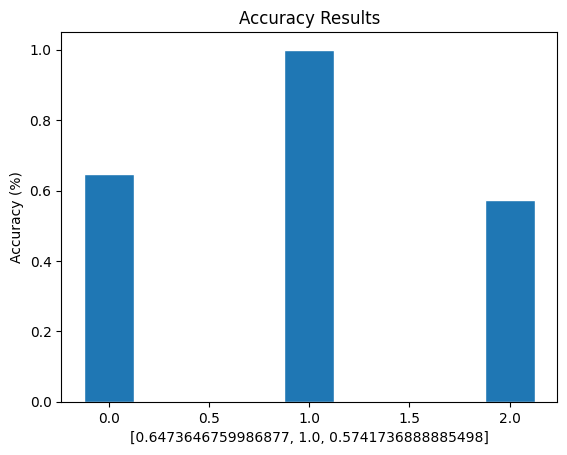

In [ ]:
import matplotlib.pyplot as plt

dataframes = [UCI_df, drug_df, drug1_df]
CNN_accuracies = [accuracy1, accuracy2, accuracy3]
barWidth = 0.25
CNN_r = np.arange(len(dataframes))

plt.bar(CNN_r, CNN_accuracies, width=barWidth, edgecolor='white')
plt.title('Accuracy Results')
plt.ylabel('Accuracy (%)')
plt.xlabel(CNN_accuracies)
plt.show()

UCI dataset top 10 recommended drugs based on Naive Bayes Algorithm

In [ ]:
# Vectorize text data
NB_reviews_vectorized_1 = vectorizer.transform(UCI_df['review'])

# Predict ratings for new reviews
NB_ratings_1 = clf.predict(NB_reviews_vectorized_1)

In [ ]:
# Get drugs with high ratings
NB_high_rating_drugs_1 = UCI_df[UCI_df['rating'].isin(NB_ratings_1)].groupby('drugName')['rating'].mean().sort_values(ascending=False)

# Print top 10 drugs with high ratings
print(NB_high_rating_drugs_1.head(10))

drugName
A + D Cracked Skin Relief    10.0
Estratest                    10.0
Eovist                       10.0
EpiPen                       10.0
Epivir                       10.0
Epivir-HBV                   10.0
Epoprostenol                 10.0
Epzicom                      10.0
Resorcinol / sulfur          10.0
Ery Pads                     10.0
Name: rating, dtype: float64


Drug1 dataset top 10 recommended drugs based on Naive Bayes Algorithm

---



In [ ]:
# Vectorize text data
NB_reviews_vectorized_2 = vectorizer.transform(drug1_df['review'])

# Predict ratings for new reviews
NB_ratings_2 = clf.predict(NB_reviews_vectorized_2)

In [ ]:
# Get drugs with high ratings
NB_high_rating_drugs_2 = drug1_df[drug1_df['rating'].isin(NB_ratings_2)].groupby('drugName')['rating'].mean().sort_values(ascending=False)

# Print top 10 drugs with high ratings
print(NB_high_rating_drugs_2.head(10))

drugName
Phentermine / topiramate            10.0
Beyaz                               10.0
Blisovi Fe 1 / 20                   10.0
Campral                             10.0
Ciprofloxacin                       10.0
Clonazepam                          10.0
Lo Loestrin Fe                      10.0
Levonorgestrel                      10.0
Mirtazapine                         10.0
Ethinyl estradiol / etonogestrel    10.0
Name: rating, dtype: float64


Drug dataset top 10 recommended drugs based on Naive Bayes Algorithm


In [ ]:
# Vectorize text data
NB_reviews_vectorized_3 = vectorizer.transform(drug_df['review'])

# Predict ratings for new reviews
NB_ratings_3 = clf.predict(NB_reviews_vectorized_3)

# Get drugs with high ratings
NB_high_rating_drugs_3 = drug_df[drug_df['rating'].isin(NB_ratings_3)].groupby('drugName')['rating'].mean().sort_values(ascending=False)

# Print top 10 drugs with high ratings
print(NB_high_rating_drugs_3.head(10))

drugName
A / B Otic             10.0
Gadoxetate disodium    10.0
Fluocinolone           10.0
Fluoride               10.0
Fluoroplex             10.0
Flurandrenolide        10.0
Forfivo XL             10.0
Fulvicin U / F         10.0
Galantamine            10.0
Fleet Bisacodyl        10.0
Name: rating, dtype: float64
